In [6]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from skimage.measure import LineModelND, ransac

In [7]:

import matplotlib
#matplotlib.rcParams['figure.figsize'] = [18, 10]

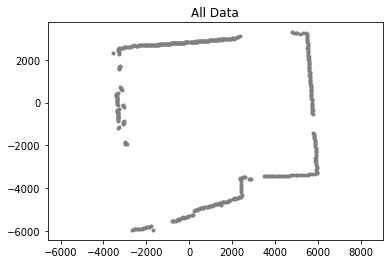

In [8]:
df = pd.read_csv('points.dat',delimiter=' ')
x_data = df.values[:,0]
y_data = df.values[:,1]

plt.plot(x_data, y_data, '.', color = 'grey')
plt.title('All Data')
plt.axis('equal')
plt.show()

In [9]:
# sliding window size
n_win = 20

# storage of angles
angs = []

startTime = time()

# loop through data
# TODO: Performance edge cases.
for idx in range(len(y_data)-n_win):
    
    # cut window
    x_curs = x_data[idx:idx+n_win]
    y_curs = y_data[idx:idx+n_win]
    
    
    # setup RANSAC
    model_LMND = LineModelND()
    points = np.column_stack([x_curs, y_curs])
    model_LMND.estimate(points)

    # RANSAC
    model_RANSAC, _ = ransac(points, LineModelND, min_samples=2, residual_threshold=5, max_trials=1000)

    # compute lines
    x_range = np.array([x_curs.min(), x_curs.max()])
    y_range = model_LMND.predict_y(x_range)
    y_range_RANSAC = model_RANSAC.predict_y(x_range)
    slope = (y_range_RANSAC[1] - y_range_RANSAC[0])/(x_range[1]- x_range[0])
    
    # TODO: We need a better way to recognize unseen walls.
    
    # store angle
    angs.append(np.arctan(slope))   
    
print('Total time: %fs' % (time()-startTime))

Total time: 31.766347s


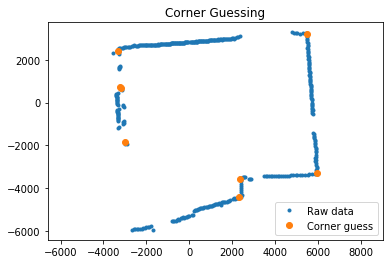

In [10]:
# corners based on thersholding
corner_idx = np.abs(np.diff(angs)) > 0.8

# arbitrary offset indexing
# TODO: Use other heuristics to determine centering!
offset = -1

# set up logical indexing window
corner_idx = np.concatenate(([False]*(int(n_win/2)-offset), corner_idx, [False]*(int(n_win/2)+1+offset)))

# retrieve corner guesses
x_corner = x_data[corner_idx]
y_corner = y_data[corner_idx]

# plot corner point guesses

plt.plot(x_data, y_data, '.')
plt.plot(x_corner, y_corner, 'o')
plt.title('Corner Guessing')
plt.legend(['Raw data', 'Corner guess'])
plt.axis('equal')
plt.show()